In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("global_disaster_response_2018_2024.csv")
df

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,1/31/2021,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,12/23/2018,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
2,8/10/2020,India,Hurricane,1.55,22,765136.99,32.54,49356.49,60.40,22,0.643,-160.978
3,9/15/2022,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350
4,9/28/2022,United States,Wildfire,3.80,64,2655864.36,21.90,188910.69,72.81,42,-19.170,-117.137
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5/14/2019,Chile,Landslide,5.50,78,3711240.93,8.45,305020.35,94.27,55,12.976,-25.680
49996,10/30/2020,United States,Wildfire,7.76,165,12072842.65,1.00,363881.25,95.46,76,57.265,-147.346
49997,4/27/2019,Turkey,Flood,4.90,130,1805859.70,5.14,280665.61,86.67,47,15.217,-27.856
49998,10/9/2022,Greece,Storm Surge,3.35,82,3176085.56,19.22,80331.23,84.75,32,-44.002,1.923


In [2]:
# Basic structure
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
df.info()

# Missing values check
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Duplicate records check
print("\nDuplicate Rows:", df.duplicated().sum())

Shape of dataset: (50000, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       50000 non-null  object 
 1   country                    50000 non-null  object 
 2   disaster_type              50000 non-null  object 
 3   severity_index             50000 non-null  float64
 4   casualties                 50000 non-null  int64  
 5   economic_loss_usd          50000 non-null  float64
 6   response_time_hours        50000 non-null  float64
 7   aid_amount_usd             50000 non-null  float64
 8   response_efficiency_score  50000 non-null  float64
 9   recovery_days              50000 non-null  int64  
 10  latitude                   50000 non-null  float64
 11  longitude                  50000 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.6+ MB


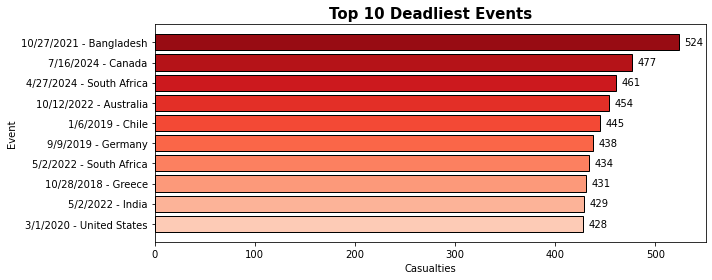

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Deadliest Events
deadliest = df.nlargest(10, 'casualties')[['date','country','disaster_type','casualties']]
deadliest["label"] = deadliest["date"].astype(str) + " - " + deadliest["country"]
colors_deadliest = plt.cm.Reds(range(50, 250, 20))[::-1]
plt.figure(figsize=(10, 4))
bars = plt.barh(deadliest['label'], deadliest['casualties'], 
                color=colors_deadliest, edgecolor="black")

plt.title("Top 10 Deadliest Events", fontsize=15, fontweight='bold')
plt.xlabel("Casualties")
plt.ylabel("Event")

for bar in bars:
    plt.text(bar.get_width() + max(deadliest['casualties']) * 0.01,
             bar.get_y() + bar.get_height()/2,
             int(bar.get_width()),
             va='center')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

1. The deadliest event occurred in Bangladesh (2021-10-27) with 524 casualties, emphasizing Bangladesh’s high human-risk exposure.
2. Countries like South Africa, Australia, Chile, Germany, Greece, India, USA appear, showing wide geographic diversity.
3. The range of casualties (428–524) suggests that even the deadliest events are somewhat contained, likely due to good emergency response systems.
4. Multiple deadly events occurred in South Africa, suggesting localized vulnerability hotspots.

1. The most costly event occurred in Chile (2020-11-17) with $24.45M in losses.

2. The top 10 costly events are clustered tightly (≈ 
22M-24M), indicating:

3. Either the dataset caps simulation values,
Or high-cost disasters occur with similar magnitudes.
Canada, Nigeria, Greece, Turkey, South Africa, Germany, Philippines, Bangladesh show up — again demonstrating global economic vulnerability.
4. High economic loss events appear across both developed and developing nations, meaning economic exposure depends more on infrastructure density than national wealth.

1. Slowest response event was in Germany (2024-06-17) with 63.1 hours — interesting because Germany is also among the most efficient responders overall.
2. This suggests that rare extreme-impact events can temporarily overwhelm even efficient systems.
Response times vary only slightly (59.1–63.1 hours), indicating:
3. Similar operational challenges across countries,
4. Possible dataset simulation standardization.
South Africa, Turkey, Indonesia, China, Philippines, Bangladesh, Australia, Mexico, India appear — showing slow response can happen in any region depending on event type and scale.

# Disaster analysis by Continents

In [7]:
# Add Continent Information

!pip install pycountry_convert

import pycountry_convert as pc

def country_to_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country)
        return pc.country_alpha2_to_continent_code(country_code)
    except:
        return "Unknown"

df['continent'] = df['country'].apply(country_to_continent)

continent_map = {
    "AF": "Africa",
    "AS": "Asia",
    "EU": "Europe",
    "NA": "North America",
    "SA": "South America",
    "OC": "Oceania",
}
df['continent'] = df['continent'].map(continent_map).fillna("Unknown")

df['continent'].value_counts()

  Attempting uninstall: pytest
    Found existing installation: pytest 6.2.3
    Uninstalling pytest-6.2.3:
      Successfully uninstalled pytest-6.2.3


Asia             17531
Europe           12477
North America     7284
South America     5120
Africa            5025
Oceania           2563
Name: continent, dtype: int64

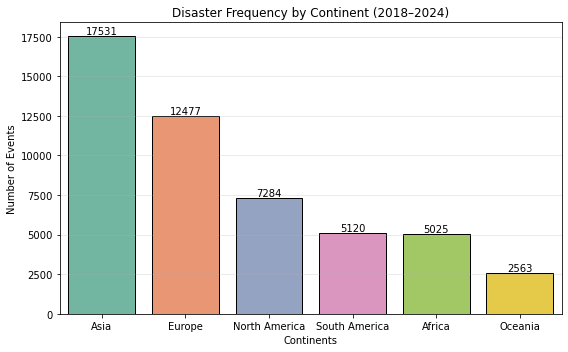

In [25]:
# Disaster Count by Continent

plt.figure(figsize=(8, 5))

cont_counts = df['continent'].value_counts()

sns.barplot(
    x=cont_counts.index,
    y=cont_counts.values,
    palette="Set2",
    edgecolor="black"
)

plt.title("Disaster Frequency by Continent (2018–2024)")
plt.xlabel("Continents")
plt.ylabel("Number of Events")
plt.grid(axis='y', alpha=0.3)

# Add counts
for i, v in enumerate(cont_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

1. Asia’s high disaster count aligns with its:
 . Large geographical area
 . High population density
2. Exposure to multiple disaster zones (Ring of Fire, monsoon regions, typhoons)
3. Europe’s high count likely includes:
4. Frequent floods, storms, heatwaves, and winter storms.
5. Oceania’s lower count reflects smaller land area and lower reporting volume but does not mean low severity.

In [11]:
!pip install geopandas pyshp shapely

  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2


In [14]:
import geopandas as gpd
!pip install pyogrio

world = gpd.read_file(
    "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip",
    engine="pyogrio"
)


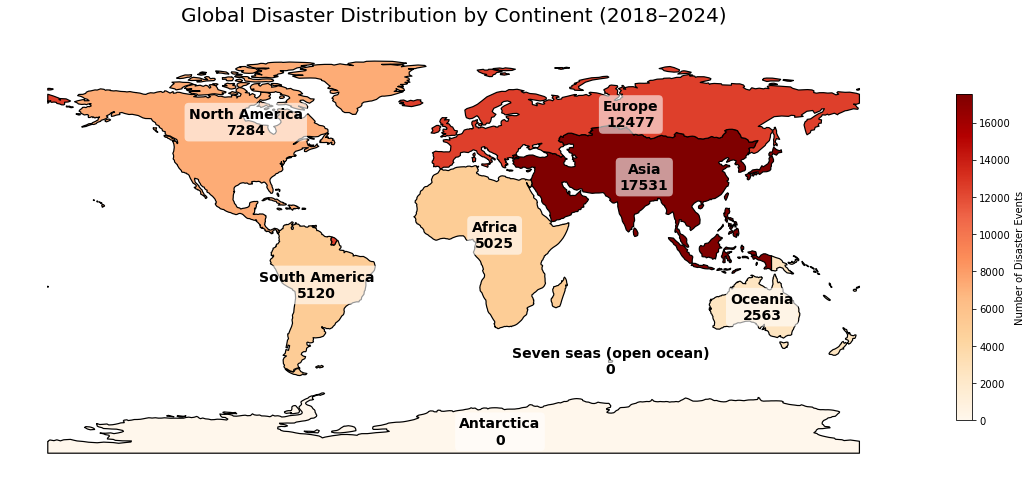

In [20]:
fig, ax = plt.subplots(figsize=(20, 12))  # Large, PPT-ready size

continents_geo.plot(
    ax=ax,
    column="disaster_count",
    cmap="OrRd",
    linewidth=1.2,
    edgecolor="black",
    legend=True,
    legend_kwds={
        "label": "Number of Disaster Events",
        "shrink": 0.5
    }
)

# Add continent name + disaster count
for idx, row in continents_geo.iterrows():
    if row["geometry"].is_empty:
        continue

    x, y = row["geometry"].centroid.coords[0]

    ax.text(
        x, y,
        f"{row['continent']}\n{int(row['disaster_count'])}",
        fontsize=14,
        fontweight="bold",
        ha="center",
        va="center",
        color="black",
        bbox=dict(
            facecolor="white",
            edgecolor="none",
            alpha=0.6,
            boxstyle="round,pad=0.3"
        )
    )

ax.set_title(
    "Global Disaster Distribution by Continent (2018–2024)",
    fontsize=20,
    pad=20
)

ax.axis("off")
plt.show()


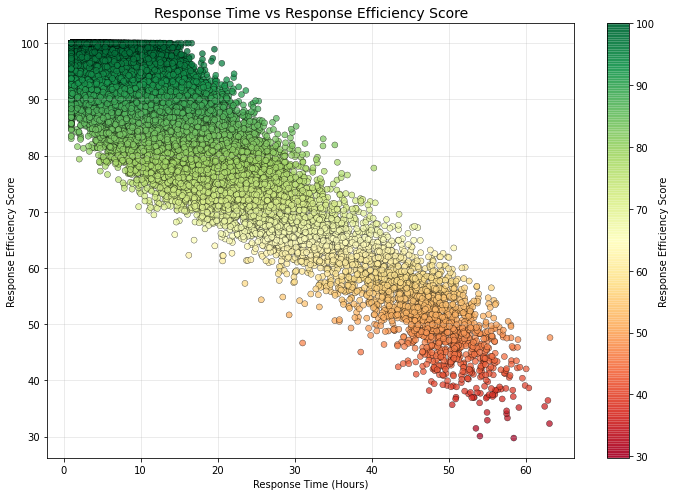

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Drop missing values for clean plotting
scatter_df = df[["response_time_hours", "response_efficiency_score"]].dropna()

plt.figure(figsize=(10, 7))

scatter = plt.scatter(
    scatter_df["response_time_hours"],
    scatter_df["response_efficiency_score"],
    c=scatter_df["response_efficiency_score"],  # Color based on efficiency
    cmap="RdYlGn",
    alpha=0.75,
    edgecolors="black",
    linewidth=0.4
)

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Response Efficiency Score")

plt.title(
    "Response Time vs Response Efficiency Score",
    fontsize=14
)
plt.xlabel("Response Time (Hours)")
plt.ylabel("Response Efficiency Score")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
